In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import xarray as xr

import opensense_data_downloader_and_transformer as oddt

# Single E-band CML data from Czech Republic
source: https://zenodo.org/record/5013463/

Note that this dataset contains much more than just the CML data, but for now we only parse the CML data.

In [2]:
oddt.download_fencl_2021_Eband_data(local_path='data/fencl_2021_Eband_data', print_output=True);

Creating path data/fencl_2021_Eband_data
to data/fencl_2021_Eband_data/Dataset_1.0.0.zip


In [3]:
ds = oddt.tranform_fencl_2021_Eband_data('data/fencl_2021_Eband_data/Dataset_1.0.0.zip')
ds

<xarray.Dataset>
Dimensions:     (sublink_id: 2, time: 59328)
Coordinates:
  * time        (time) datetime64[ns] 2019-03-10 ... 2019-10-01T23:55:00
    cml_id      <U16 'cz_example_cml_1'
    length      float64 4.866
  * sublink_id  (sublink_id) <U2 'ab' 'ba'
    site_0_lon  float64 14.53
    site_1_lon  float64 14.53
    site_0_lat  float64 50.03
    site_1_lat  float64 50.03
Data variables:
    tl          (sublink_id, time) float64 50.3 50.3 50.2 ... 50.2 50.2 50.3
    frequency   (sublink_id) float64 73.5 83.5
Attributes:
    title:                 NA
    file author(s):        NA
    institution:           NA
    date:                  NA
    source:                NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA
    comment:               NA

In [9]:
oddt.check_existence_of_required_vars(ds)

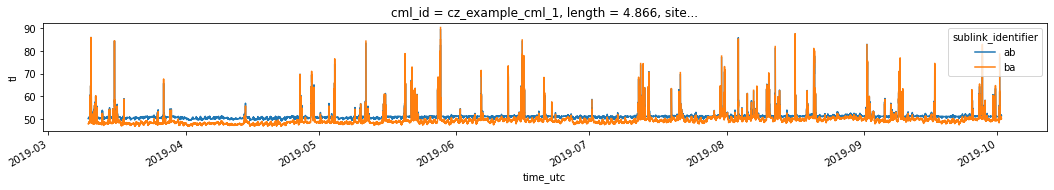

In [10]:
ds.tl.plot.line(x='time', figsize=(18,2));

# Data from 6 Eband CMLs from Czech Republic
source: https://zenodo.org/record/4090953

Note that coordinates are rounded.

In [11]:
oddt.download_fencl_2020_Eband_data(
    local_path='data/fencl_2020_Eband_CML',
    print_output=True,
)

Creating path data/fencl_2020_Eband_CML
to data/fencl_2020_Eband_CML/dataset.zip


('data/fencl_2020_Eband_CML/dataset.zip',
 <http.client.HTTPMessage at 0x158029430>)

In [12]:
ds_list = oddt.transform_fencl_2020_Eband_data(
    local_path = "data/fencl_2020_Eband_CML/",
    fn = 'dataset.zip'
)

Parsing raw data from raw/commercial_microwave_links_total_loss/1a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/1b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6b.csv


## Plot part of the time series
Note that the two sublinks are combined manually because we do not store them in a joint `xarray.Dataset` to preserve the raw unequally spaced time stamps.

Further note that we plot only the beginning of the time series to reduce memory, which is limited when using Binder in particular.

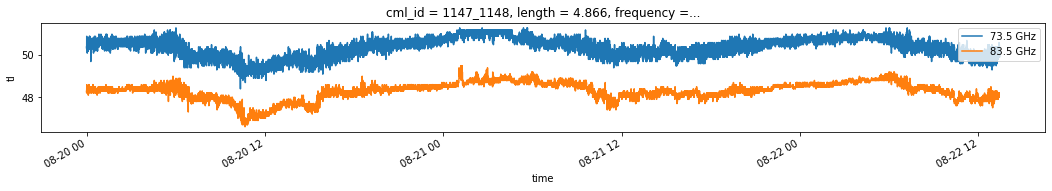

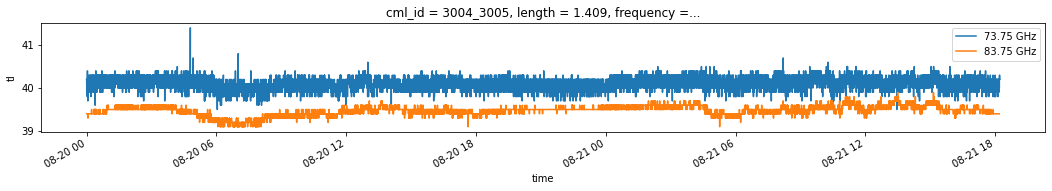

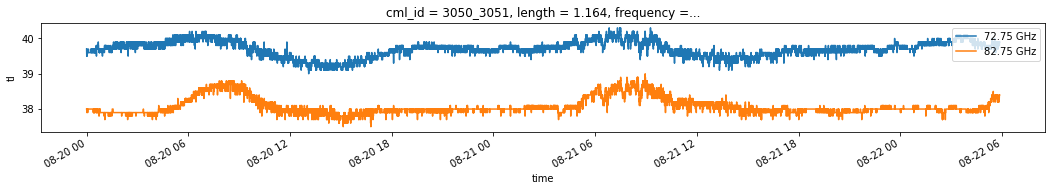

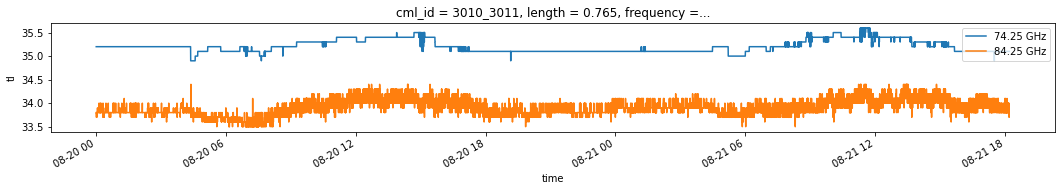

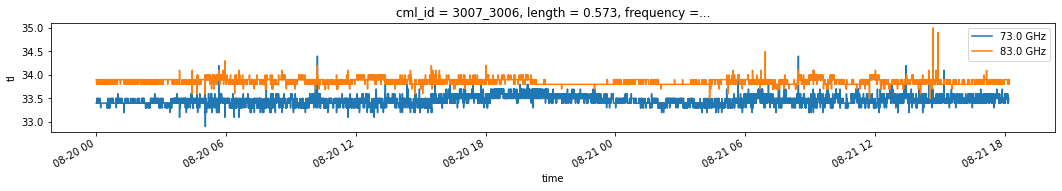

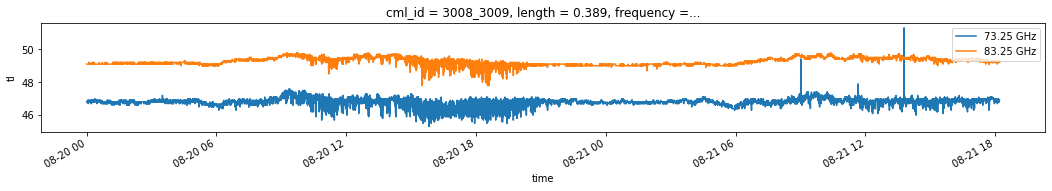

In [13]:
for i, ds in enumerate(ds_list):
    if i%2 == 0:
        fig, ax = plt.subplots(figsize=(18, 2))
    ds.tl.isel(time=slice(0,50000)).plot(x='time', ax=ax, label=f'{ds.frequency.values} GHz');
    plt.legend(loc=1)

# Example data from German CMLs with fake coordinates
Provided as example data in `pycomlink` https://github.com/pycomlink/pycomlink

In [14]:
oddt.download_data_file(
    url='https://github.com/pycomlink/pycomlink/raw/master/pycomlink/io/example_data/example_cml_data.nc',
    local_path='data/pycomlink_example_data',
    print_output=True,
)

Creating path data/pycomlink_example_data
to data/pycomlink_example_data/example_cml_data.nc


('data/pycomlink_example_data/example_cml_data.nc',
 <http.client.HTTPMessage at 0x15f4fc970>)

In [15]:
ds = oddt.transform_German_CML_data(
    'data/pycomlink_example_data/example_cml_data.nc'
)
ds

<xarray.Dataset>
Dimensions:       (time: 15840, cml_id: 500, sublink_id: 2)
Coordinates:
  * time          (time) datetime64[ns] 2018-05-10 ... 2018-05-20T23:59:00
  * cml_id        (cml_id) object '0' '1' '2' '3' ... '496' '497' '498' '499'
    length        (cml_id) float64 ...
    site_0_lat    (cml_id) float64 ...
    site_0_lon    (cml_id) float64 ...
    site_1_lat    (cml_id) float64 ...
    site_1_lon    (cml_id) float64 ...
  * sublink_id    (sublink_id) object 'channel_1' 'channel_2'
    frequency     (cml_id, sublink_id) float64 ...
    polarization  (cml_id, sublink_id) object ...
Data variables:
    rsl           (sublink_id, cml_id, time) float32 ...
    tsl           (sublink_id, cml_id, time) float32 ...
Attributes:
    title:                 NA
    file author(s):        NA
    institution:           NA
    date:                  NA
    source:                NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA
    comment:               NA

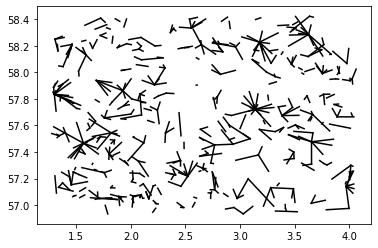

In [16]:
import matplotlib.pyplot as plt
for lon1, lat1, lon2, lat2 in zip(
    ds.site_0_lon, 
    ds.site_0_lat,
    ds.site_1_lon, 
    ds.site_1_lat):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

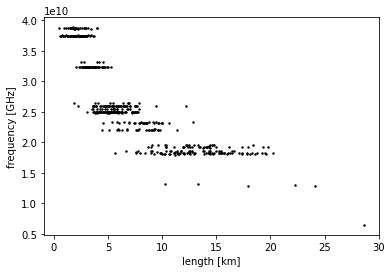

In [17]:
plt.scatter(ds.length.values, ds.frequency.isel(sublink_id=0).values, s=2, color='black')
plt.xlabel("length [km]")
plt.ylabel("frequency [GHz]");

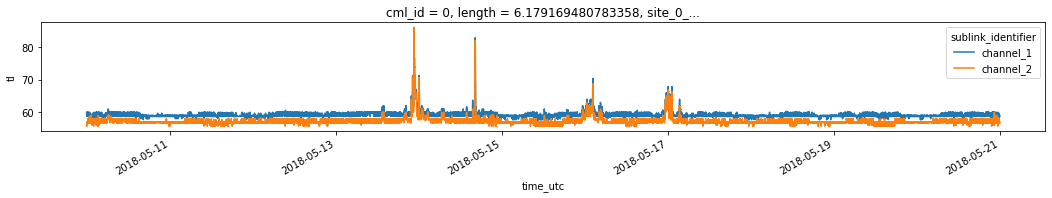

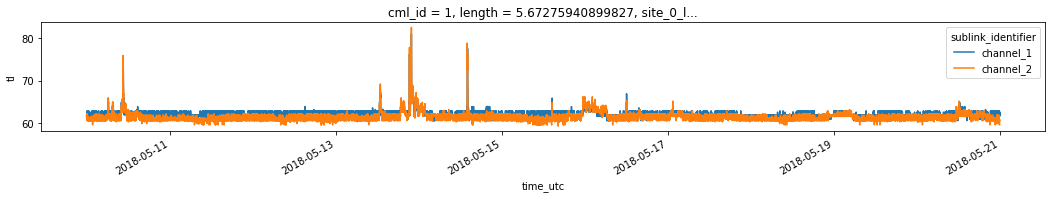

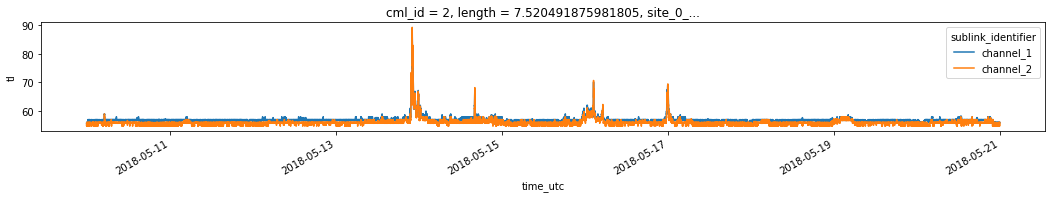

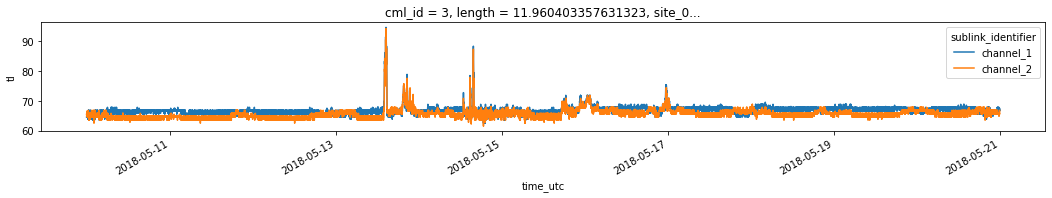

In [18]:
# Set defaul fill values to NaN
ds['tsl'] = ds.tsl.where(ds.tsl != 255.0)
ds['rsl'] = ds.rsl.where(ds.rsl != -99.9)
# Calculate TL
ds['tl'] = ds.tsl - ds.rsl

# Plot
for i in range(4):
    ds.isel(cml_id=i).tl.plot.line(x='time', figsize=(18,2));

# OpenMRG dataset from SMHI with large CML dataset
source: https://zenodo.org/record/6673751

Note that OpenMRG also contains reference data from rain gauges and weather radar data, but for now we focus only on the CML data.

In [2]:
oddt.download_andersson_2022_OpenMRG(local_path='data/andersson_2022_OpenMRG/', print_output=True)

File already exists at desired location data/andersson_2022_OpenMRG/OpenMRG.zip
Not downloading!


In [3]:
import numpy as np

In [4]:
ds_all = oddt.transform_andersson_2022_OpenMRG(
    fn='data/andersson_2022_OpenMRG/OpenMRG.zip', 
    path_to_extract_to='data/andersson_2022_OpenMRG/',
    time_start_end = ('2015-08-27T00', '2015-08-27T23:59:51'), # default (None, None) -> no timeslicing. ie. ('2015-08-31T00', None),
    restructure_data = True, # if true this restructures the nc file to ['cml_id', 'sublink_id', 'time']
    resample_1min = True, # if true this resamples data from 10s to 1min mean
)

In [5]:
ds_all

<xarray.Dataset>
Dimensions:       (cml_id: 364, sublink_id: 2, time: 1440)
Coordinates:
  * cml_id        (cml_id) float64 0.0 1.0 2.0 3.0 ... 360.0 361.0 362.0 363.0
    sublink       (cml_id, sublink_id) int64 195 194 253 254 ... 704 703 702 701
  * sublink_id    (sublink_id) <U9 'sublink_1' 'sublink_2'
  * time          (time) datetime64[ns] 2015-08-27 ... 2015-08-27T23:59:00
    length        (cml_id) float64 0.6914 0.6146 0.3237 ... 1.873 4.806 1.412
    site_0_lat    (cml_id) float64 57.7 57.73 57.69 57.71 ... 57.65 57.66 57.71
    site_0_lon    (cml_id) float64 12.0 11.98 11.97 11.97 ... 12.12 12.03 12.01
    site_1_lat    (cml_id) float64 57.7 57.72 57.69 57.7 ... 57.66 57.63 57.71
    site_1_lon    (cml_id) float64 11.99 11.97 11.98 11.97 ... 12.14 11.97 11.98
    frequency     (cml_id, sublink_id) float64 28.21 29.21 38.53 ... 28.25 29.26
    polarization  (cml_id, sublink_id) object 'Vertical' ... 'Vertical'
Data variables:
    rsl           (cml_id, sublink_id, time) float64 -46.0 -46.0 ... -51.03
    tsl           (cml_id, sublink_id, time) float64 1.0 1.0 1.0 ... 0.0 0.0 0.0
Attributes:
    title:                 NA
    file author(s):        NA
    institution:           NA
    date:                  NA
    source:                NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA
    comment:               NA

In [7]:
#del ds.rsl.attrs{'missing_value'}

In [8]:
ds = ds_all.isel(sublink_id=0)

In [9]:
ds['tsl']=ds.tsl.where(ds.tsl!=0)
ds['rsl']=ds.rsl.where(ds.rsl!=0)

In [10]:
rsl = ds.rsl.values

In [11]:
np.isnan(rsl).sum()


270448

In [12]:
#rsl[np.isnan(rsl)]=-9999

In [13]:
ds['rsl'].values=rsl

In [14]:
tsl=ds.tsl.values

In [15]:
#tsl[np.isnan(tsl)]=-9999

In [16]:
ds['tsl'].values=tsl

In [17]:
np.isnan(rsl).sum()

270448

In [18]:
ds_list = [ds.isel(cml_id=i) for i in range(len(ds.cml_id))]

for cml in ds_list:
    if cml.polarization == 'Vertical':
        cml['polarization'] = 'v'
    if cml.polarization == 'Horizontal':
        cml['polarization'] = 'h'
ds=xr.concat(ds_list,dim='cml_id')

In [19]:
ds

<xarray.Dataset>
Dimensions:       (cml_id: 364, time: 1440)
Coordinates:
  * cml_id        (cml_id) float64 0.0 1.0 2.0 3.0 ... 360.0 361.0 362.0 363.0
    sublink       (cml_id) int64 195 253 209 616 621 509 ... 724 696 720 704 702
    sublink_id    <U9 'sublink_1'
  * time          (time) datetime64[ns] 2015-08-27 ... 2015-08-27T23:59:00
    length        (cml_id) float64 0.6914 0.6146 0.3237 ... 1.873 4.806 1.412
    site_0_lat    (cml_id) float64 57.7 57.73 57.69 57.71 ... 57.65 57.66 57.71
    site_0_lon    (cml_id) float64 12.0 11.98 11.97 11.97 ... 12.12 12.03 12.01
    site_1_lat    (cml_id) float64 57.7 57.72 57.69 57.7 ... 57.66 57.63 57.71
    site_1_lon    (cml_id) float64 11.99 11.97 11.98 11.97 ... 12.14 11.97 11.98
    frequency     (cml_id) float64 28.21 38.53 38.53 28.23 ... 29.24 28.18 28.25
    polarization  (cml_id) <U1 'v' 'v' 'v' 'v' 'v' 'v' ... 'v' 'v' 'v' 'v' 'v'
Data variables:
    rsl           (cml_id, time) float64 -46.0 -46.0 -46.0 -46.0 ... nan nan nan
    tsl           (cml_id, time) float64 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan
Attributes:
    title:                 NA
    file author(s):        NA
    institution:           NA
    date:                  NA
    source:                NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA
    comment:               NA

In [20]:
np.isnan(ds.rsl).sum()

<xarray.DataArray 'rsl' ()>
array(270448)
Coordinates:
    sublink_id  <U9 'sublink_1'

In [21]:
(ds.rsl == 0).sum()

<xarray.DataArray 'rsl' ()>
array(0)
Coordinates:
    sublink_id  <U9 'sublink_1'

In [22]:

np.unique(ds.rsl.values)

array([-90.        , -89.66666412, -89.65000153, ..., -32.25      ,
       -32.20000076,          nan])

In [23]:
ds

<xarray.Dataset>
Dimensions:       (cml_id: 364, time: 1440)
Coordinates:
  * cml_id        (cml_id) float64 0.0 1.0 2.0 3.0 ... 360.0 361.0 362.0 363.0
    sublink       (cml_id) int64 195 253 209 616 621 509 ... 724 696 720 704 702
    sublink_id    <U9 'sublink_1'
  * time          (time) datetime64[ns] 2015-08-27 ... 2015-08-27T23:59:00
    length        (cml_id) float64 0.6914 0.6146 0.3237 ... 1.873 4.806 1.412
    site_0_lat    (cml_id) float64 57.7 57.73 57.69 57.71 ... 57.65 57.66 57.71
    site_0_lon    (cml_id) float64 12.0 11.98 11.97 11.97 ... 12.12 12.03 12.01
    site_1_lat    (cml_id) float64 57.7 57.72 57.69 57.7 ... 57.66 57.63 57.71
    site_1_lon    (cml_id) float64 11.99 11.97 11.98 11.97 ... 12.14 11.97 11.98
    frequency     (cml_id) float64 28.21 38.53 38.53 28.23 ... 29.24 28.18 28.25
    polarization  (cml_id) <U1 'v' 'v' 'v' 'v' 'v' 'v' ... 'v' 'v' 'v' 'v' 'v'
Data variables:
    rsl           (cml_id, time) float64 -46.0 -46.0 -46.0 -46.0 ... nan nan nan
    tsl           (cml_id, time) float64 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan
Attributes:
    title:                 NA
    file author(s):        NA
    institution:           NA
    date:                  NA
    source:                NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA
    comment:               NA

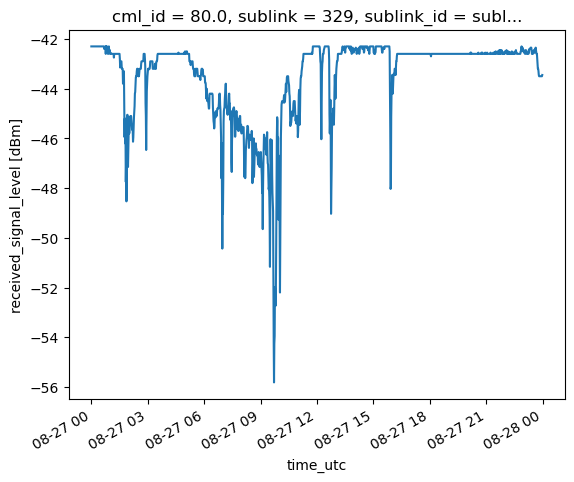

In [24]:
ds.rsl.isel(cml_id=80).plot()

In [25]:
ds["tsl"] = ds.tsl.interpolate_na(dim="time", method="linear", max_gap="5min")
ds["rsl"] = ds.rsl.interpolate_na(dim="time", method="linear", max_gap="5min")

In [26]:
ds.tsl.attrs.pop('missing_value')
ds.tsl.attrs

{'units': 'dBm',
 'coordinates': 'cml_id, sublink_id, time',
 'long_name': 'transmitted_signal_level'}

In [27]:
ds.rsl.attrs.pop('missing_value')
ds.rsl.attrs

{'units': 'dBm',
 'coordinates': 'cml_id, sublink_id, time',
 'long_name': 'received_signal_level'}

In [28]:
ds.to_netcdf(
    path='openMRG_example.nc',
    encoding={
        'rsl': {
            'dtype': 'int32',
            'scale_factor': 0.01,
            '_FillValue': -9999,
            'zlib': True, 
            'complevel': 4},
        'tsl':{
            'dtype': 'int32',
            'scale_factor': 0.01,
            '_FillValue': -9999,
            'zlib': True, 
            'complevel': 4}
    }
)


In [ ]:
# move the saved file to prefered directory (here data)

In [29]:
np.isnan(ds.rsl.values).sum()

270399

In [30]:
# We chunk that DataArrays here to get dask.arrays instead of numpy arrays.
# This dramatically reduced the RAM needed to do something like ds.trs - ds.rsl, 
# which we do below and which might now work on a binder pod with only some
# GB of RAM
ds['tsl'] = ds.tsl.chunk({'sublink_id': 1})
ds['rsl'] = ds.rsl.chunk({'sublink_id': 1})

ValueError: some chunks keys are not dimensions on this object: {'sublink_id'}

In [ ]:
import matplotlib.pyplot as plt
for lon1, lat1, lon2, lat2 in zip(
    ds.site_0_lon, 
    ds.site_0_lat,
    ds.site_1_lon, 
    ds.site_1_lat):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

In [ ]:
# the two channels has slightly different frequencies, according to the metadata
plt.scatter(ds.length.values,ds.isel(sublink_id = 0).frequency.values,s=2,color='black')
plt.xlabel("length [km]")
plt.ylabel("frequency [GHz]");

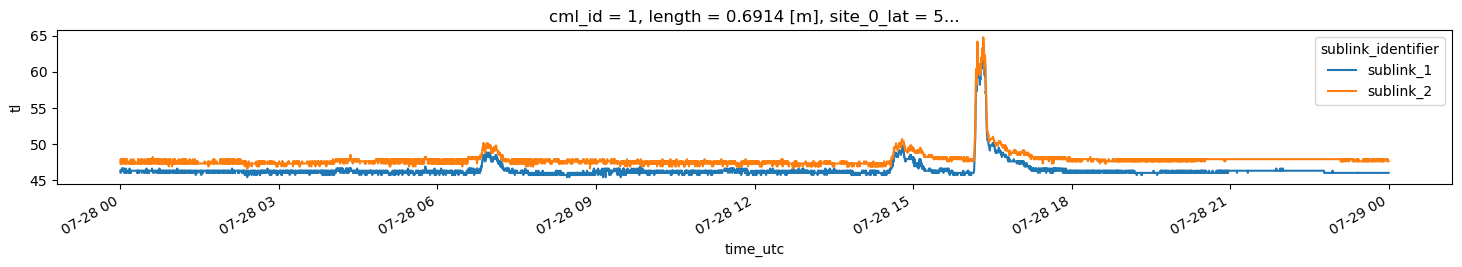

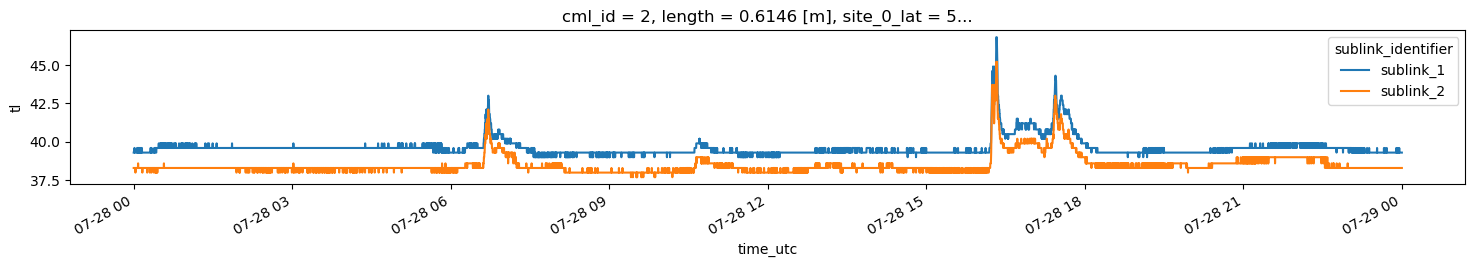

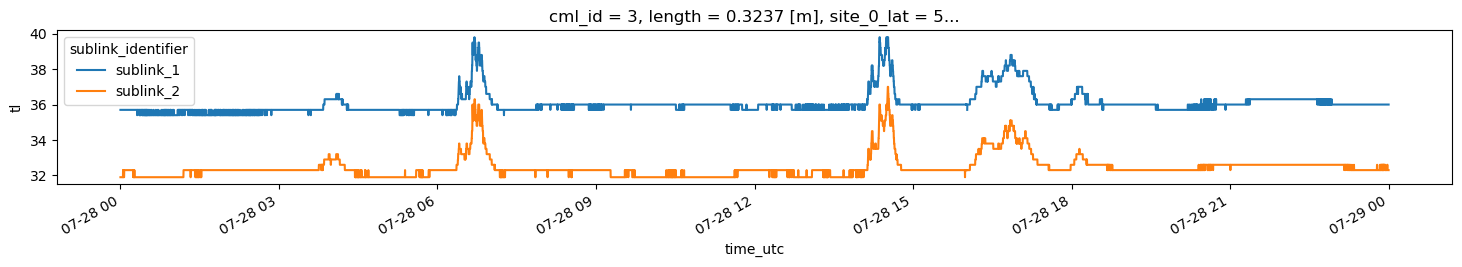

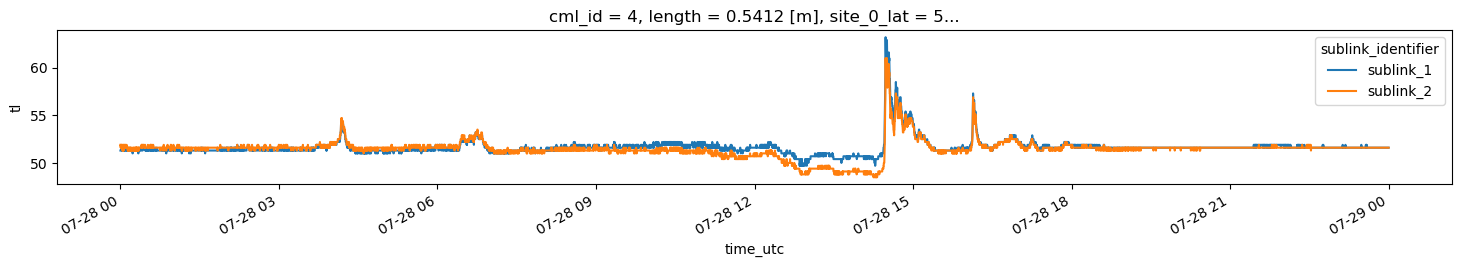

In [9]:
# Calculate TL
ds['tl'] = ds.tsl - ds.rsl

# Plot
for i in range(4):
    ds.isel(cml_id=i).tl.plot.line(x='time', figsize=(18,2));

# Large CML dataset from the Netherlands

source: https://data.4tu.nl/articles/dataset/Commercial_microwave_link_data_for_rainfall_monitoring/12688253

In [21]:
oddt.download_overeem_2019_large_CML_data_Netherlands(
    local_path='data/overeem_2019_large_CML_data_Netherlands', 
    print_output=True,
)

File already exists at desired location data/overeem_2019_large_CML_data_Netherlands/data.zip
Not downloading!


In [22]:
ds = oddt.transform_overeem_2019_large_CML_data_Netherlands(
    fn='data/overeem_2019_large_CML_data_Netherlands/data.zip', 
    nrows=1e6,
)

cml 295 has 342 duplicated entries from 684 rows.
cml 319 has 342 duplicated entries from 684 rows.
cml 341 has 342 duplicated entries from 684 rows.
cml 369 has 340 duplicated entries from 685 rows.
cml 602 has 343 duplicated entries from 686 rows.
cml 857 has 345 duplicated entries from 691 rows.
cml 892 has 343 duplicated entries from 686 rows.
cml 928 has 344 duplicated entries from 688 rows.
cml 1039 has 345 duplicated entries from 690 rows.
cml 1133 has 336 duplicated entries from 681 rows.
cml 1146 has 345 duplicated entries from 690 rows.
cml 1442 has 342 duplicated entries from 685 rows.
cml 1737 has 346 duplicated entries from 692 rows.
cml 1805 has 337 duplicated entries from 679 rows.
cml 1910 has 345 duplicated entries from 690 rows.
cml 1996 has 342 duplicated entries from 684 rows.
cml 2079 has 345 duplicated entries from 690 rows.
cml 2099 has 342 duplicated entries from 684 rows.
cml 2109 has 342 duplicated entries from 684 rows.
cml 2310 has 345 duplicated entries fro

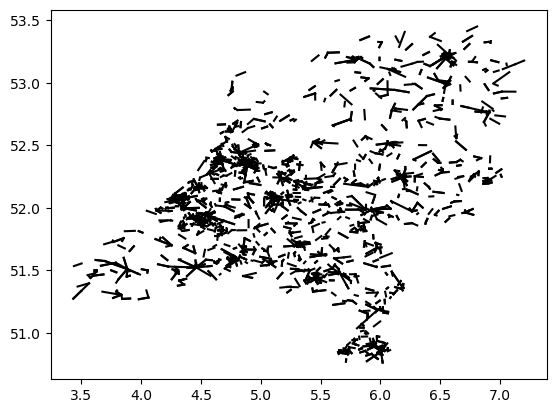

In [23]:
for lon1, lat1, lon2, lat2 in zip(
    ds.site_0_lon, 
    ds.site_0_lat,
    ds.site_1_lon, 
    ds.site_1_lat):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

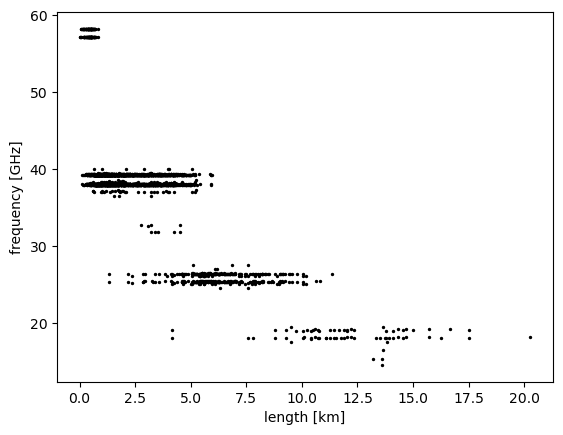

In [24]:
plt.scatter(ds.length.values,ds.frequency.values,s=2,color='black')
plt.xlabel("length [km]")
plt.ylabel("frequency [GHz]");